### Histograms
A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
pokemon = pd.read_csv('data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

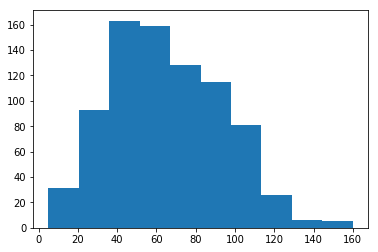

In [4]:
plt.hist(data = pokemon, x = 'speed')

By default, the hist function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. 

Use of descriptive statistics (e.g. via ```df['num_var'].describe()```) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function.

(array([ 0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         1.,  0., 11.,  0.,  0.,  0.,  0., 13.,  0.,  1.,  4.,  1., 10.,
         0.,  1.,  4.,  3., 33.,  2.,  5.,  2.,  1., 26.,  6.,  2.,  3.,
         1., 36.,  2.,  8.,  8.,  3., 34.,  3.,  2.,  6.,  1., 45.,  3.,
         5.,  0.,  0., 29.,  4.,  4.,  8.,  3., 49.,  3.,  2.,  3.,  5.,
        40.,  4.,  4.,  6.,  1., 37.,  5.,  5.,  3.,  3., 15.,  3.,  3.,
         3.,  3., 33.,  3.,  1.,  4.,  4., 29.,  0.,  1.,  1.,  1., 29.,
         4.,  3.,  3.,  0., 27.,  2.,  7.,  3.,  3., 24.,  6.,  2.,  2.,
         2., 10.,  2.,  1.,  6.,  3., 11.,  2.,  3.,  1.,  1.,  8.,  2.,
         1.,  1.,  0.,  4.,  1.,  1.,  1.,  1.,  4.,  1.,  0.,  0.,  0.,
         5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15

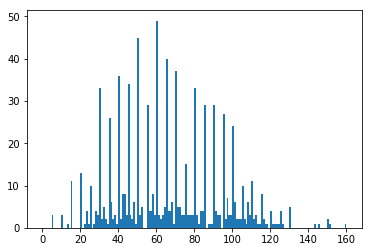

In [12]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges)

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

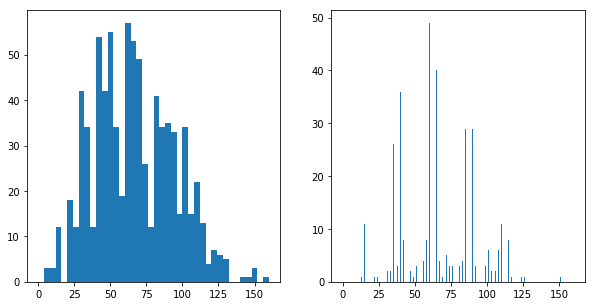

In [19]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

### Alternative Approach
The seaborn function distplot can also be used to plot a histogram, and is integrated with other univariate plotting functions.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


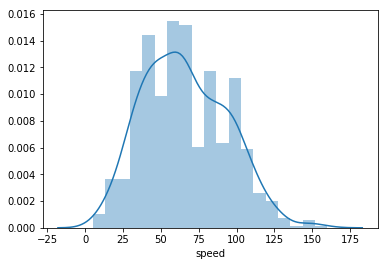

In [16]:
sb.distplot(pokemon['speed']);

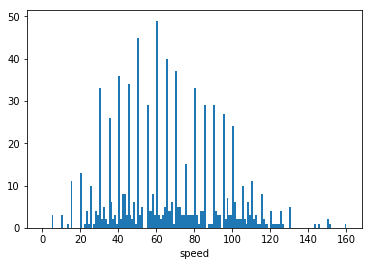

In [17]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1})